In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import chart_studio.plotly
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.datasets import make_classification
import itertools


In [174]:
ufc = pd.read_csv(os.path.join("resources/cleaning_data2.csv"))
ufc.head()

,Unnamed: 0,Unnamed: 0.1,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
0,0,-1.726640,-0.391336,0.326151,-1.860973,0.478884,1.230498,0.687376,-0.152808,0.367581,...,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541,red
1,1,-1.724301,-0.919548,-0.620339,0.264110,-0.238947,0.368410,-0.251779,-0.152808,-0.541039,...,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541,blue
2,2,-1.721961,0.136876,-0.620339,1.680831,-0.546589,-1.861027,-0.251779,-0.152808,-0.541039,...,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541,red
3,3,-1.719622,-0.919548,-0.620339,-1.860973,-0.751684,1.293468,-1.190935,-0.152808,-0.541039,...,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541,blue
4,4,-1.717283,0.665089,0.326151,-0.208131,-1.059326,0.446373,-0.855522,-0.152808,-0.541039,...,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541,red


In [175]:
y = ufc['winner']
X = ufc.drop(columns = 'winner')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [176]:
X_train

,Unnamed: 0,Unnamed: 0.1,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
620,620,-0.250578,-0.919548,-0.620339,-0.208131,-0.033853,1.163031,-0.855522,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
309,309,-0.996796,-0.391336,-0.620339,1.208591,-0.751684,-0.841513,-0.855522,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
144,144,-1.385111,3.306149,-0.620339,0.500230,0.478884,0.186996,0.687376,-0.152808,3.093441,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
276,276,-1.073991,0.136876,0.326151,-1.388732,-1.572062,0.515340,-1.459265,-0.152808,1.276201,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
667,667,-0.133616,0.665089,0.326151,-0.916492,-0.033853,0.308438,-0.251779,-0.152808,0.367581,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,16,-1.689212,-0.391336,-0.620339,0.500230,-0.238947,-1.607648,-0.251779,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
58,58,-1.588625,1.193301,-0.620339,-0.208131,-0.033853,0.389400,-0.251779,-0.152808,1.276201,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
277,277,-1.071652,-0.919548,-0.620339,0.736350,1.606904,-1.201341,2.498605,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
255,255,-1.123115,-0.919548,-0.620339,0.027989,1.299262,1.185520,2.632770,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541


In [177]:
X_test

,Unnamed: 0,Unnamed: 0.1,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
958,958,0.554122,0.136876,-0.620339,-1.624852,-0.751684,0.245468,-0.855522,-0.152808,0.367581,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
514,514,-0.505555,0.136876,-0.620339,0.500230,-0.238947,-2.169879,-0.587192,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
882,882,0.374000,2.249725,0.326151,-1.624852,-0.238947,0.291946,-0.251779,-0.152808,3.093441,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
1376,1376,1.552978,2.249725,1.272640,0.264110,0.273789,0.530332,-0.251779,-0.152808,3.093441,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
552,552,-0.416664,0.136876,0.326151,1.208591,0.478884,-2.289822,0.687376,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,264,-1.102062,-0.919548,-0.620339,-0.916492,0.478884,0.294945,-0.251779,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
911,911,0.441838,1.193301,1.272640,0.264110,0.478884,-0.213313,0.217799,-0.152808,1.276201,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
148,148,-1.375754,-0.919548,-0.620339,1.208591,0.786526,1.154035,2.364440,-0.152808,-0.541039,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541
742,742,0.041827,1.193301,-0.620339,-1.860973,-1.059326,0.233474,-1.190935,-0.152808,1.276201,...,-0.273128,-0.141531,-0.184894,-0.076025,-0.101175,-0.107402,-0.100091,-0.276483,-0.071501,-0.278541


In [178]:
y_train

620      red
309      red
144     blue
276      red
667     blue
        ... 
16      blue
58       red
277      red
255      red
1344    blue
Name: winner, Length: 1088, dtype: object

In [179]:
y_test

958      red
514      red
882     blue
1376     red
552      red
        ... 
264      red
911      red
148      red
742     blue
810     blue
Name: winner, Length: 363, dtype: object

In [180]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred= model.predict(X_test)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [181]:
y_pred

array(['red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red',
       'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'red',
       'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red',
       'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue',
       'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red',
       'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red',
       'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue',
       'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red',
       'red', 'red', 'blue', 'red', 'red', 'blue', 'red'

In [182]:
accuracy_score(y_test, y_pred)

0.8980716253443526

In [183]:
y_train.value_counts()

red     642
blue    446
Name: winner, dtype: int64

In [184]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[105,  33],
       [  4, 221]])

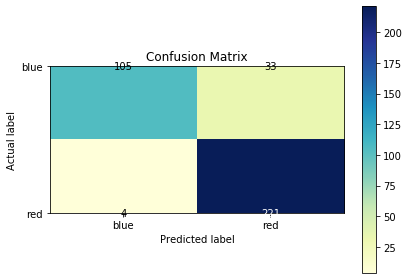

In [172]:
cm = confusion_matrix(y_test, y_pred)
classes = unique_labels(y_test, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap="YlGnBu")
ax.figure.colorbar(im, ax=ax)

   
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='Actual label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax